# Analisis de datos cardiopatias

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
datos_cardiopatias = pd.read_csv('Cardiopatia/heart_cleveland_upload.csv')
datos_cardiopatias

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


## Exploración de dataset de cardiopatias

In [9]:
datos_cardiopatias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [11]:
datos_cardiopatias.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


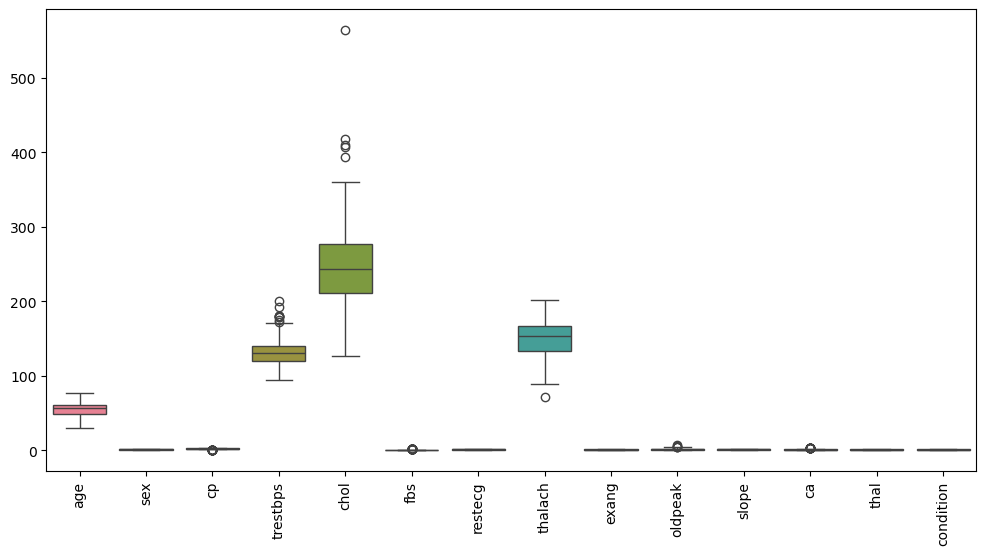

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=datos_cardiopatias)
plt.xticks(rotation=90)
plt.show()

## Analisis exploratorio:
1. De acuerdo al analisis de los datos se pudo determinar que se encontraron algunos resultados donde se presentan algunas anomalias con valores extremos:
   - trestbps(presión arterial cuando ingreso al hospital) los valores registrados extremos
   - chol (colesterol) tiene varios valores superiores a 500 mg/dl, lo cual no es común en poblaciones sanas teniendo encuneta que los avlores son de personas que se encuentran en UCI
   - thalach (frecuencia cardíaca máxima alcanzada) muestra algunos valores altos fuera del rango normal.
   - Variables como sex, cp, fbs, restecg, exang, slope, ca, thal y condition son categóricas como por ejemplo el sexo, la edad que muestran valores de clasificacón por ejemplo si es hombre o es mujer, si tiene un dolor agudo o no, si presenta diabetes o no.
   - 

In [17]:
print(datos_cardiopatias.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


### tratamiento de datos
Una vez verificados que no hayan datos nulos y teniendo en cuenta **_que se realiazara el entrenamiento del modelo de regresión logistica_**      El modelo solo entiende números, no texto ni categorías. Tenemos variables:
- sex que me indica que es hombre o mujer (1 o 0)
- cp me indica dolor toraxico (de 0 a 3)
- fbs indica si tiene un ecceso de azucar en la sangre (es 1 o 0) serviria si tuvieramos el valor del resultado del examen
- restecg resultados ele , no es el resultado del examen son categorias (de 0 a 3)
-  exang angina inducida al hacer ejercicio. tampoco nos sirve porque sus valores son categorias (de 0 a 1)
-  slope esta variable me indica cómo responde el corazón al esfuerzo. en este caso no se nos da el valor del examen si no una categoria (de 0 a 2)
- ca: mide la cantidad de vasos sanguíneos principales. en este caso tampoco nos da el valor, solo da una categoria (de 0 a 2)
- thal se refiere a los resultados de una prueba que evalúa el flujo de sangre al corazón usando una sustancia radiactiva. tampoco nos muestra el resultado, solo la categoria que se encunetra entre 0 a 2
- condition se refiere si tiene una enfermedad de base o no, teniendo en cuenta esto no nos indica los resultados si no la categoria entre (0 o 1)

### Inicialmente no se tendran en cuenta estas variables para el modelo, es decir los eliminaremos del dataset

